In [39]:
# 🌸 Iris Flower Classification

In [40]:
# Basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Display settings
%matplotlib inline
sns.set(style="ticks")

In [41]:
# Try a few likely paths (adjust if needed)
paths = ["Iris.csv", "./Iris.csv", "/mnt/data/iris_data/Iris.csv", "/mnt/data/IRIS-CLASSIFICATION/Iris.csv"]
csv_path = next((p for p in paths if os.path.exists(p)), None)
if csv_path is None:
    raise FileNotFoundError("Iris.csv not found. Put Iris.csv in the notebook folder or update the path list.")
    
df = pd.read_csv(csv_path)
print("Loaded:", csv_path)
df.head()

Loaded: Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Shape: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Sample Id values: [1, 2, 3, 4, 5]


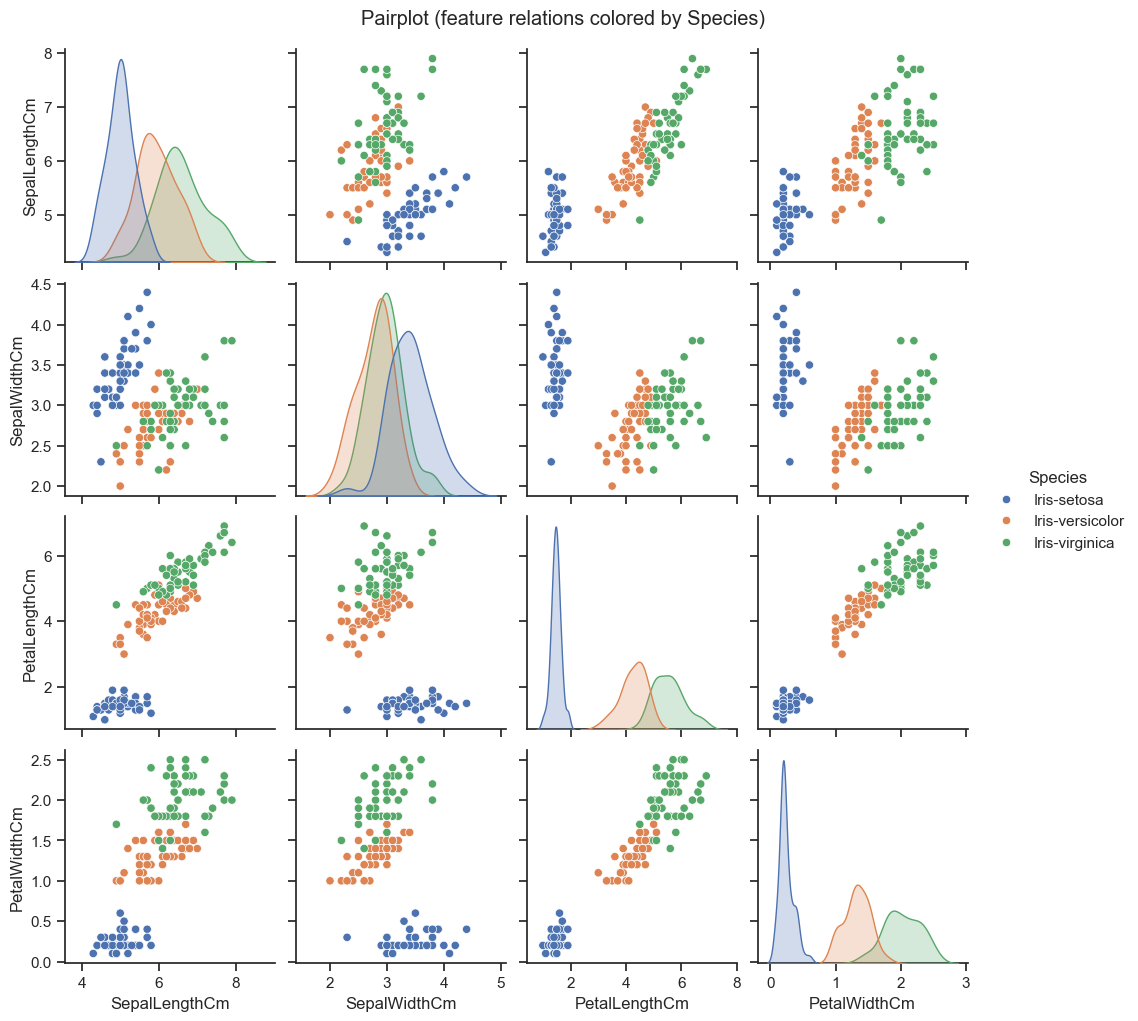

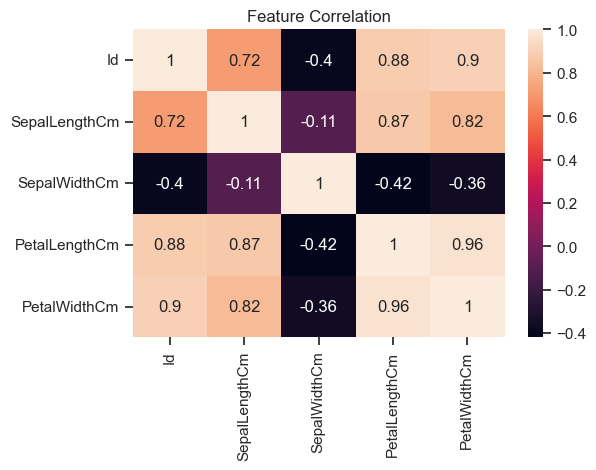

In [42]:
# Basic info and stats
print("Shape:", df.shape)
display(df.info())
display(df.describe())

# If 'Id' exists, show first few; if not, ignore
if 'Id' in df.columns:
    print("Sample Id values:", df['Id'].head().tolist())

# Pairplot (comment out if running in slow environment)
sns.pairplot(df.drop(columns=['Id'], errors='ignore'), hue='Species')
plt.suptitle("Pairplot (feature relations colored by Species)", y=1.02)
plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

In [43]:
# Make a safe copy
df = df.copy()

# Drop Id if present
df = df.drop(columns=['Id'], errors='ignore')

# Ensure Species exists
if 'Species' not in df.columns:
    raise ValueError("Column 'Species' is missing from the dataset.")

# Features and labels
X = df.drop(columns=['Species'])
y = df['Species']

# Encode target labels
le = LabelEncoder()
y_enc = le.fit_transform(y)   # 0,1,2

print("Classes:", le.classes_)
print("Feature columns:", X.columns.tolist())

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Feature columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [44]:
# Stratify to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.20, random_state=42, stratify=y_enc
)

# Scale features (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Quick checks
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)


In [46]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=False, random_state=42)
}

results = {}
for name, model in models.items():
    # For tree-based models scaling isn't necessary, but using scaled features is okay
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = (acc, model)
    print(f"{name} Accuracy: {acc:.3f}")

C:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.933
Decision Tree Accuracy: 0.900
Random Forest Accuracy: 0.900
SVM Accuracy: 0.967


Best model: SVM (Accuracy: 0.967)

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



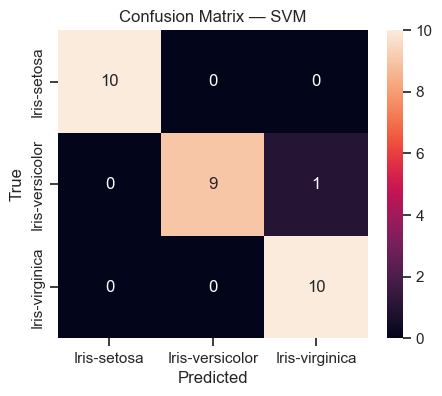

In [47]:
# pick best by accuracy
best_name = max(results, key=lambda k: results[k][0])
best_acc, best_model = results[best_name]
print(f"Best model: {best_name} (Accuracy: {best_acc:.3f})\n")

# Predictions and report
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix — {best_name}')
plt.show()

In [48]:
# Cross-validation on training set (5-fold)
cv_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
cv_scores = cross_val_score(cv_model, scaler.fit_transform(X), y_enc, cv=5)
print("Logistic Regression 5-fold CV accuracies:", np.round(cv_scores, 4))
print("Mean CV accuracy:", cv_scores.mean())

Logistic Regression 5-fold CV accuracies: [0.9667 1.     0.9333 0.9    1.    ]
Mean CV accuracy: 0.9600000000000002


C:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in

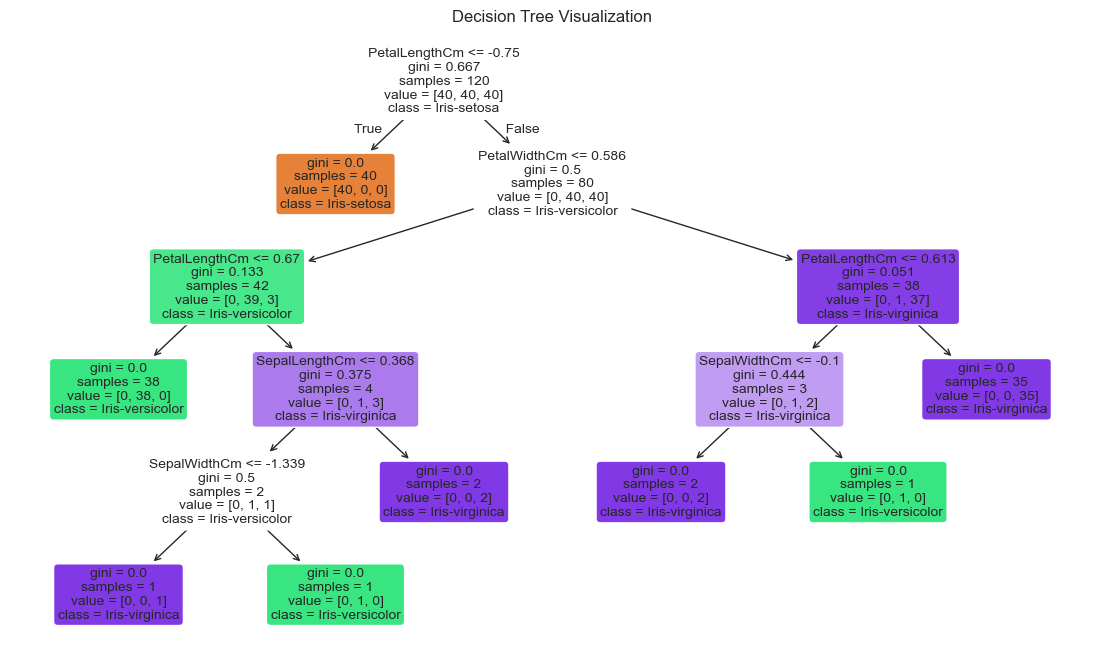

In [49]:
# If you trained a Decision Tree, visualize it
if "Decision Tree" in models:
    dt = results["Decision Tree"][1]
    plt.figure(figsize=(14,8))
    plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show()

In [50]:
# Save the best model and scaler for later use/deployment
output_dir = "model_output"
os.makedirs(output_dir, exist_ok=True)

joblib.dump(best_model, os.path.join(output_dir, "best_model.pkl"))
joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))
print(f"Saved best model ({best_name}) and scaler to '{output_dir}/'")

Saved best model (SVM) and scaler to 'model_output/'


In [51]:
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred, target_names=le.classes_))

Test Accuracy (SVM): 0.9666666666666667

Classification Report (SVM):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [52]:
import joblib, os
os.makedirs("model_output", exist_ok=True)
joblib.dump(best_model, "model_output/best_model.pkl")
joblib.dump(scaler, "model_output/scaler.pkl")
print("Saved to model_output/")

Saved to model_output/
